In [ ]:
pip install flashtext

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
pd.set_option('display.max_colwidth', -1)

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from sklearn.utils import shuffle
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.python.keras.utils.vis_utils import plot_model
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
import tensorflow as tf

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned data.csv to cleaned data.csv


In [ ]:
dataset=pd.read_csv('cleaned data.csv')
dataset.dropna(inplace = True)
dataset

,Id,Text,Class,Filtered_sentence
0,0,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව…,Political,දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත නිවේදනය අදාාල අමි වීරසිංහ කල මාධ්‍ සාකච්චාව…
1,1,මා UNP හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින කිසිම පක්ෂයකින් ඡන්දයකට ඉදිරිපත් වෙනවා කියා නැ ඒකාබද්ධ විපක්ෂය වැනි වි…,Political,මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි පක්ෂ චන්දයක ඉදිරිප වෙ කි නැ එකාබද්ධ විපක්ෂ වි…
2,2,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා මිතුරු පරය,Neutral,කිම තර කොහේද විද ගල උරන මා මිතුර පරය
3,3,එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙ කොහොම උනේ 😂😂 පරය අපි අය කරල නේ 😂
4,4,විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා පරය රටට වෑඩක් කරපන් යකො හොරා,Political,විමල ගොන වගෙ එකෙ මෑරෙ හද පරය රටට වෑඩ කර යකො හොර
...,...,...,...,...
1674,1705,පීටීඒ සහ අයිසීසීපීආර් පනත යටතේ වැරදි ලෙස ගොනු කර ඇති විමර්ශන හෝ නඩු ප්‍රමාද වීම පිළිබඳව ඔබ සතුටු නොවන්නේ නම් කරුණාකර මුහීඩ් ජීරාන් මානව හිමිකම් ක්‍රියාකාරික වෙත දන්වන්න,Racist,පීටීඑ අයිසීසීපීඅර පනත යටත වැරදි ගො කර විමර්ෂ නඩු ප්‍රමා වීම ඔබ සතුට නොව කරුනාකර මුහීඩ ජීරා මාන හිමික ක්‍රියාකාරික දන්ව
1675,1706,අරාබි රටවල් මුස්ලිම් නොවන සඳහා සුපිරි වෙළඳසැල් වල තිබුණු ඌරු මස් අවසර ඇත මනුෂ්‍යත්වයට ගරු කරන්න,Racist,අරාබි රට මුස්ලි නොව සුපිරි වෙලදසැල වල තිබ උරු මස් අවසර ඇත මනුෂ්‍යත්වය ගරු කර
1676,1707,හැවිරිදි මුස්ලිම් පිරිමි ළමයෙක් ඉස්ලාම් භීතිකාවේ ඉලක්කය බවට පත්වූ අතර ගෝලීය විවෘත රජයේ සමුළු අවස්ථාව සඳහා ඔහුගේ නියෝජනය විනාශ විය,Racist,හැවිරිදි මුස්ලි පිරි ලමය ඉස්ලා බීතික ඉලක්ක පත්ව ගෝල විවෘත රජ සමුල අවස්ථා ඔහු නියෝජන විනාෂ විය
1677,1708,ශ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන දේශපාලන හා ආගමික පීඩනය සම්බන්ධයෙන් යුරෝපා සංගමයේ ඒකාබද්ධ ප්‍රකාශය,Racist,ලංක මුස්ලි ප්‍රජා එල් කරන දේෂපාල අගමික පීඩන සම්බන්ධ යුරෝප සංගම එකාබද්ධ ප්‍රකාෂ


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(dataset.Text, dataset.Class, test_size=0.7)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
import math
math.sqrt(len(y_test))

34.27827300200522

In [ ]:
#define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=33, p=3,metric='euclidean')

In [ ]:
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=3,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:
#Evaluate Model
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[653   0   2   0   0   0]
 [101   2   0   0   0   0]
 [ 99   0   3   0   1   0]
 [106   0   0   5   0   0]
 [107   0   0   0   0   0]
 [ 95   0   0   0   0   1]]


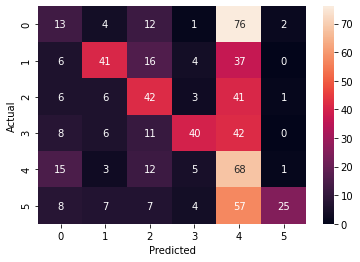

In [ ]:
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(f1_score(y_test, y_pred,average='micro'))
print(accuracy_score(y_test, y_pred))

0.5676595744680851
0.5676595744680851


MultinomialNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.Filtered_sentence, dataset.Class, test_size=0.35)

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test.astype(str), predictions.astype(str)) * 100)

Accuracy:  51.42857142857142


In [ ]:
print (vectorizer.vocabulary_)

{'උබ': 155, 'දර': 424, 'උන': 146, 'පස': 524, 'බල': 545, 'ඔබ': 217, 'ලල': 711, 'තම': 390, 'වහබ': 765, 'මල': 582, 'ඉර': 124, 'රහ': 682, 'ජන': 329, 'මහත': 591, 'පර': 506, 'ෂන': 773, 'සම': 804, 'පත': 496, 'කර': 262, 'ලවයස': 714, 'ඇස': 106, 'ඉද': 115, 'ඇග': 83, 'මව': 585, 'එල': 197, 'වදද': 733, 'මරද': 578, 'වයස': 745, 'එත': 186, 'ඇයට': 101, 'එක': 168, 'බද': 537, 'පක': 486, 'දනය': 417, 'අද': 21, 'අම': 41, 'රස': 680, 'කල': 279, 'කච': 234, 'හම': 846, 'රන': 659, 'සල': 819, 'පහල': 527, 'අවස': 65, 'නය': 467, 'ටඩ': 346, 'ෂප': 775, 'ඇද': 91, 'ගන': 297, 'කඩ': 241, 'කරන': 269, 'ඉන': 119, 'කද': 247, 'අතල': 19, 'අත': 17, 'වලට': 754, 'ටය': 350, 'ඉස': 133, 'සර': 814, 'අප': 32, 'නව': 476, 'දන': 416, 'මත': 566, 'ලකන': 688, 'කපනවම': 255, 'ෆන': 861, 'පහ': 525, 'සමහර': 811, 'තක': 378, 'එනව': 190, 'වචනයය': 725, 'උර': 161, 'පව': 519, 'කක': 232, 'ගත': 295, 'වග': 722, 'නට': 451, 'රල': 672, 'ගහ': 315, 'ඔන': 214, 'ගලග': 307, 'උත': 143, 'වර': 747, 'ගර': 303, 'නවර': 480, 'රත': 653, 'යටත': 609, 'යන': 613, 'රය': 670, '

In [ ]:
confusion_matrix(y_test,predictions)

array([[19,  3,  2,  8, 16,  8],
       [ 6, 32,  4,  6,  4,  1],
       [ 2,  7, 25,  6, 15,  2],
       [ 5,  2,  2, 27,  5,  6],
       [ 7,  1,  4, 11, 25,  1],
       [ 6,  1,  2,  3,  7, 34]])

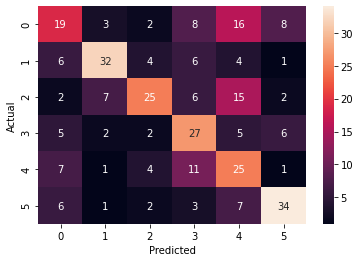

In [ ]:

import seaborn as sn
sn.heatmap(confusion_matrix(y_test,predictions), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification based on keywords

In [ ]:
Class_1_opinion_keywords = ['මගේ මතය අනුව', 'මම විශ්වාස කරනවා', 'මගේ මනසේ', 'එය පෙනේ', 'එය තර්ක කළ හැකිය', 'මෙම යෝජනා', 'මෙය සනාථ කරයි', 
                    'මෙම අදහස සඳහා සහය දක්වයි', 'නමුත්']

Class_2_feeling_keywords = ['කාර්යබහුලයි','ආකර්ශනය වුනා','උද්යෝගිමත් කළා','සංවර විය','සතුටුයි','හරවා යවන ලදි','නිරත විය','විනෝදාස්වාදය','සතුටුයි','උනන්දුවක්',
                    'සම්බන්ධයි','සතුටුයි','පූර්වගාමී','නියාමනය','වාව්','භාග්‍යවන්තයෙකි','ප්‍රීතිමත්','නොසැලකිලිමත්','සතුටු සිතින්','විශ්වාසයෙන් යුතුව','අන්තර්ගතය',
                    'ප්‍රීති ප්‍රමෝදය','උද්දීපනය විය','නැඹුරු','සතුට','බලවත්','ආරක්ෂිතයි','ස්වයං පිළිගැනීම','ශක්තිමත්','තෘප්තියට පත් විය','සතුටු','බියෙන්','දුක',
                    'උණුසුම්','විනෝදජනකයි','කම්මැලියි','කනස්සල්ල','විශ්වාසයෙන් යුතුව','සීතල','සැක සහිතයි','පුදුමයි','ආදරණීය','කුතුහලයෙන්','ඊර්ෂ්යා','ඊර්ෂ්යාව',
                    'කාලකණ්ණි','ව්‍යාකූලයි','මෝඩ','තරහයි','අසනීප','ලැජ්ජයි','ඉවත් කර ඇත','උදාසීන','සමාවන්න','තීරණය කර ඇත','පිස්සු','බෂ්ෆුල්',
                    'මානසික අවපීඩනය','කෝපයට පත් විය','බියට පත් විය','උනන්දුවක්','බලාපොරොත්තුව','කනගාටුයි','බයයි','මුරණ්ඩු','පිපාසය','වරදකාරිත්වය',
                    'ලැජ්ජාවට පත්වේ','පිළිකුල','ආඩම්බරයි','තනිකම','කලකිරීමට පත් විය','රිදෙනවා','කුසගින්න','වෙහෙසට පත්ව ඇත','කල්පනාකාරී',
                    'වේදනාකාරී','සුභවාදී','සහනයක්','ප්‍රහේලිකාවක්','කම්පනයට පත් විය','ප්රීතිමත්','නිදිමත','කලබලයි','සැකයි','නරක','කනස්සල්ලට පත්ව සිටී']

Class_3_keywords_concept = []

Class_4_keywords_criticism = []

keywords=Class_1_opinion_keywords + Class_2_feeling_keywords

In [ ]:
from flashtext.keyword import KeywordProcessor
kp0=KeywordProcessor()
for word in keywords:
    kp0.add_keyword(word)
kp1=KeywordProcessor()
for word in Class_1_opinion_keywords:
    kp1.add_keyword(word)
kp2=KeywordProcessor()
for word in Class_2_feeling_keywords:
    kp2.add_keyword(word)


In [ ]:
def percentage1(dum0,dumx):
    try:
        ans=float(dumx)/float(dum0)
        ans=ans*100
    except:
        return 0
    else:
        return ans

In [ ]:
def find_class(x):
    y0 = len(kp0.extract_keywords(x))
    y1 = len(kp1.extract_keywords(x))
    y2 = len(kp2.extract_keywords(x))
    
    Total_matches=y0   
    per1 = float(percentage1(y0,y1))
    per2 = float(percentage1(y0,y2))
    
    if y0==0:
        Category='None'
    else:
        if per1!=0 and per2!=0:
            Category='opinion with feelings'
        elif per1!=0:
            Category='opinion'
        elif per2!=0:
            Category='feeling'
       
    return Category

In [ ]:
print(find_class("මගේ මතය අනුව කම්පනයට පත් විය ප්රීතිමත්"))

opinion with feelings


polarity and subjectivity detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

import seaborn as sns

In [ ]:
polarity =[]
subjectivity =[]
for i in dataset['Text'].values:
  try:
    analysis =TextBlob(i)
    porlarity.apppend(analysis.sentiment.polarity)
    subjectivity.apppend(analysis.sentiment.subjectivity)

  except:
      polarity.append(0)
      subjectivity.append(0)

dataset['polarity'] = polarity
dataset['subjectivity'] = subjectivity

In [ ]:
dataset

,Id,Text,Class,Filtered_sentence,polarity,subjectivity
0,0,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව…,Political,දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත නිවේදනය අදාාල අමි වීරසිංහ කල මාධ්‍ සාකච්චාව…,0,0
1,1,මා UNP හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින කිසිම පක්ෂයකින් ඡන්දයකට ඉදිරිපත් වෙනවා කියා නැ ඒකාබද්ධ විපක්ෂය වැනි වි…,Political,මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි පක්ෂ චන්දයක ඉදිරිප වෙ කි නැ එකාබද්ධ විපක්ෂ වි…,0,0
2,2,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා මිතුරු පරය,Neutral,කිම තර කොහේද විද ගල උරන මා මිතුර පරය,0,0
3,3,එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙ කොහොම උනේ 😂😂 පරය අපි අය කරල නේ 😂,0,0
4,4,විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා පරය රටට වෑඩක් කරපන් යකො හොරා,Political,විමල ගොන වගෙ එකෙ මෑරෙ හද පරය රටට වෑඩ කර යකො හොර,0,0
...,...,...,...,...,...,...
1674,1705,පීටීඒ සහ අයිසීසීපීආර් පනත යටතේ වැරදි ලෙස ගොනු කර ඇති විමර්ශන හෝ නඩු ප්‍රමාද වීම පිළිබඳව ඔබ සතුටු නොවන්නේ නම් කරුණාකර මුහීඩ් ජීරාන් මානව හිමිකම් ක්‍රියාකාරික වෙත දන්වන්න,Racist,පීටීඑ අයිසීසීපීඅර පනත යටත වැරදි ගො කර විමර්ෂ නඩු ප්‍රමා වීම ඔබ සතුට නොව කරුනාකර මුහීඩ ජීරා මාන හිමික ක්‍රියාකාරික දන්ව,0,0
1675,1706,අරාබි රටවල් මුස්ලිම් නොවන සඳහා සුපිරි වෙළඳසැල් වල තිබුණු ඌරු මස් අවසර ඇත මනුෂ්‍යත්වයට ගරු කරන්න,Racist,අරාබි රට මුස්ලි නොව සුපිරි වෙලදසැල වල තිබ උරු මස් අවසර ඇත මනුෂ්‍යත්වය ගරු කර,0,0
1676,1707,හැවිරිදි මුස්ලිම් පිරිමි ළමයෙක් ඉස්ලාම් භීතිකාවේ ඉලක්කය බවට පත්වූ අතර ගෝලීය විවෘත රජයේ සමුළු අවස්ථාව සඳහා ඔහුගේ නියෝජනය විනාශ විය,Racist,හැවිරිදි මුස්ලි පිරි ලමය ඉස්ලා බීතික ඉලක්ක පත්ව ගෝල විවෘත රජ සමුල අවස්ථා ඔහු නියෝජන විනාෂ විය,0,0
1677,1708,ශ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන දේශපාලන හා ආගමික පීඩනය සම්බන්ධයෙන් යුරෝපා සංගමයේ ඒකාබද්ධ ප්‍රකාශය,Racist,ලංක මුස්ලි ප්‍රජා එල් කරන දේෂපාල අගමික පීඩන සම්බන්ධ යුරෝප සංගම එකාබද්ධ ප්‍රකාෂ,0,0
